
Read a frame every second (every 25 frames) and input it into the YOLO model, to get the output image with the detected objects.


(ultralytics & YOLO)


In [7]:
import cv2 # OpenCV library
import numpy as np  # for mathematical matrices and so on (to save images)
import matplotlib.pyplot as plt # for plotting

In [8]:
# Read the video and save every 25th frame in a list.
cap = cv2.VideoCapture('road.mp4')

frames_list = []

i = 1

while True:
  ret, frame = cap.read()
  if (i % 25 == 0):
    frames_list.append(frame)
  i = i + 1

  if not ret:
    print("End of the video")
    break

cap.release()
cv2.destroyAllWindows

End of the video


<function destroyAllWindows>

In [9]:
# print(frames_list)

In [10]:
print(len(frames_list))

47


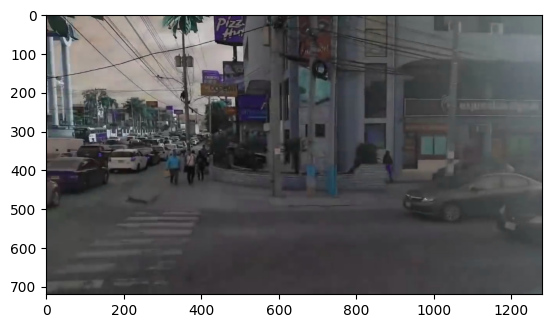

In [11]:
plt.imshow(frames_list[0])

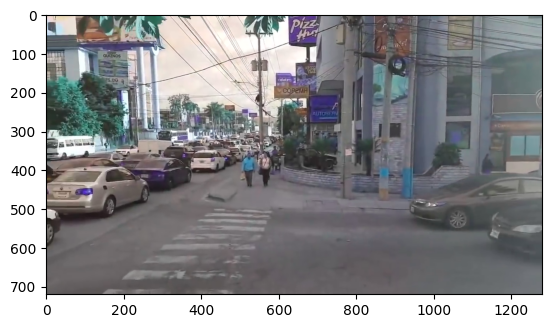

In [12]:
plt.imshow(frames_list[1])

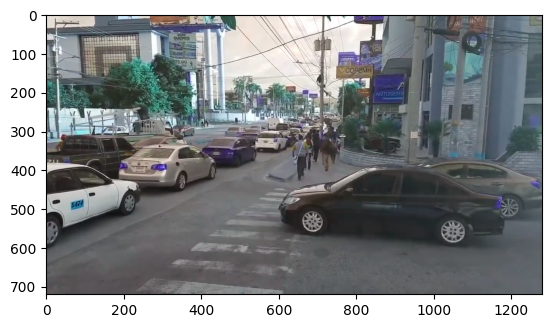

In [13]:
plt.imshow(frames_list[40])

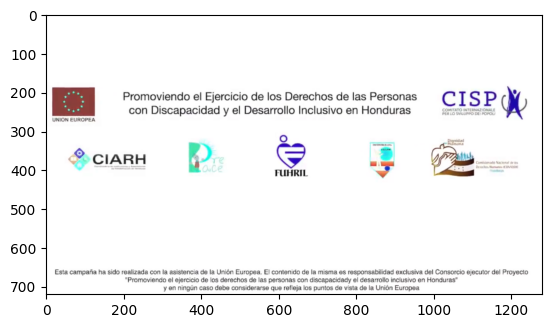

In [14]:
plt.imshow(frames_list[46])

In [15]:
# Delete the last saved frame in the list, since it doesnt contain anything that we are interested in detecting
del frames_list[41:]

In [16]:
print(len(frames_list))

41


In [18]:
!pip install ultralytics
# Ultralytics is a deep learning library that provides a high-level interface
# for working with various computer vision tasks, particularly focusing on object
# detection and segmentation. It is commonly used in the context of deep learning
# projects that involve training and evaluating models for tasks such as image recognition.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.5/719.5 kB 7.9 MB/s eta 0:00:00


In [19]:
# Now, using the YOLO library, we will detect any object in every saved frame
from ultralytics import YOLO
model = YOLO("yolov8m.pt")

frames_with_detected_objects = []

for frame in frames_list:
  # Perform YOLO prediction on each frame
  res_frame = model.predict(source=frame, save=True, conf=0.2, iou=0.5)

  # Append the frame with detected objects to the result list
  frames_with_detected_objects.append(res_frame)

100%|██████████| 49.7M/49.7M [00:00<00:00, 137MB/s]



0: 384x640 4 persons, 10 cars, 1 truck, 1 traffic light, 1325.7ms
Speed: 32.5ms preprocess, 1325.7ms inference, 39.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict

0: 384x640 4 persons, 17 cars, 2 buss, 2 trucks, 1 traffic light, 912.4ms
Speed: 2.7ms preprocess, 912.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict

0: 384x640 4 persons, 19 cars, 2 trucks, 1 traffic light, 908.7ms
Speed: 2.6ms preprocess, 908.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict

0: 384x640 4 persons, 21 cars, 1 truck, 1 traffic light, 1 potted plant, 926.7ms
Speed: 2.6ms preprocess, 926.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict

0: 384x640 3 persons, 20 cars, 1 truck, 1 traffic light, 1 handbag, 979.2ms
Speed: 3.2ms preprocess, 979.2ms inference, 1.6ms postprocess per image at shape (1, 3, 3

In [20]:
print(len(frames_with_detected_objects))

41


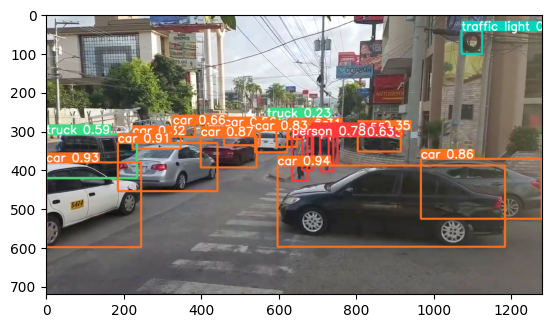

In [27]:
plot = frames_with_detected_objects[40][0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
plt.imshow(plot)

In [31]:
# Plot the frames with drawn rectangles in subplots
num_frames = len(frames_with_detected_objects)
rows = (num_frames + 2) // 3  # Calculate the number of rows needed

figure, axes = plt.subplots(rows, 3, figsize=(18, 6 * rows))

for i, frame in enumerate(frames_with_detected_objects):
    row_index = i // 3
    col_index = i % 3
    plot = frame[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    axes[row_index, col_index].imshow(plot)

# Remove any empty subplots if the number of frames is not a multiple of 3
if num_frames % 3 != 0:
    for j in range(num_frames % 3, 3):
        figure.delaxes(axes[rows - 1, j])

plt.show()

Output hidden; open in https://colab.research.google.com to view.